# ****Ad-Click Prediction****

Importing Libraries and dataset

In [162]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# import data
data = pd.read_csv("/kaggle/input/advertising/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Analysing the data

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [165]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [166]:
data.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

In [167]:
# no null values found

Data visualization

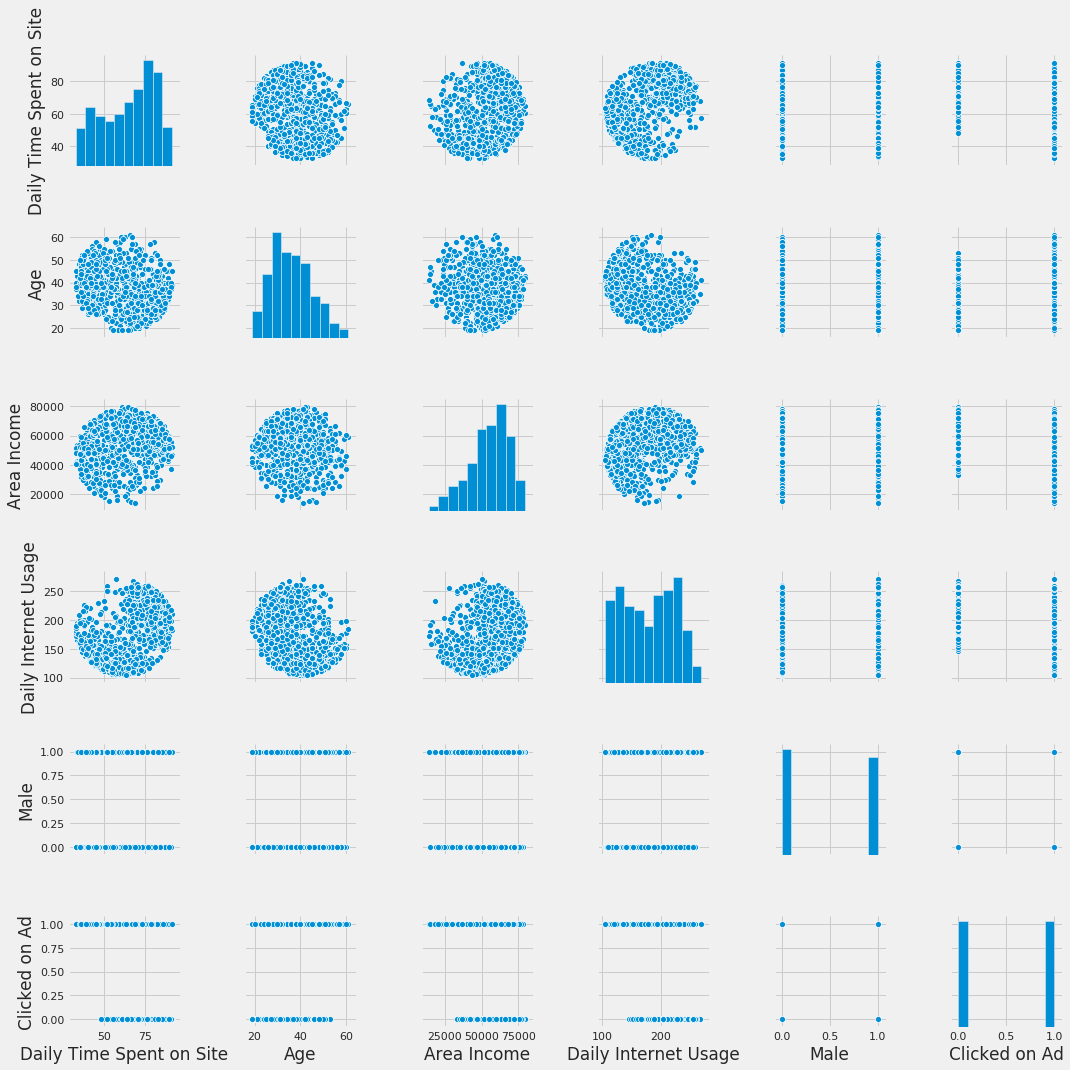

In [168]:
# through this pairplot we can see the distribution
sns.pairplot(data)

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


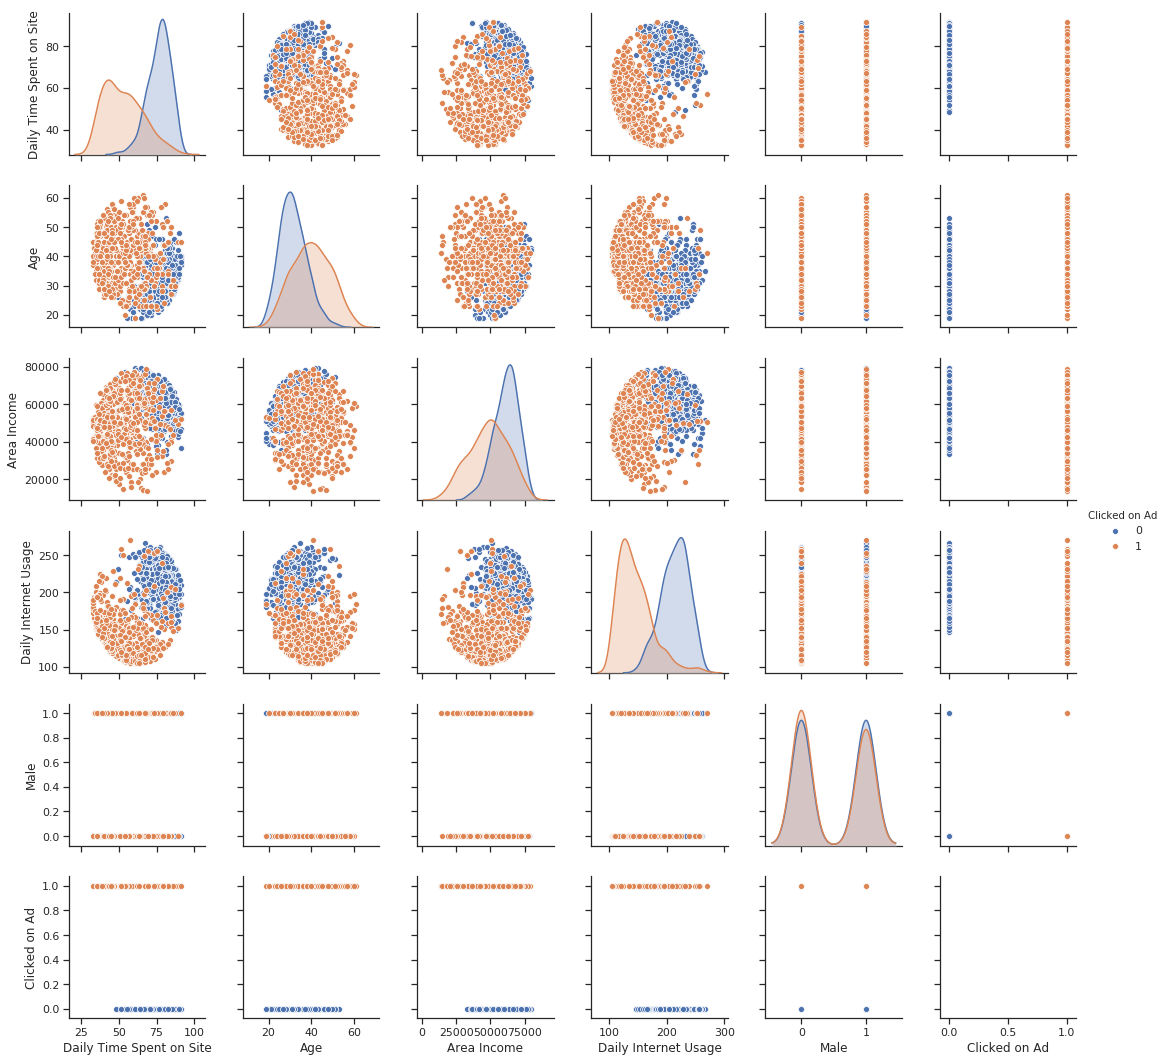

In [169]:
# corellation with respect to the ad-clicked
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue='Clicked on Ad')

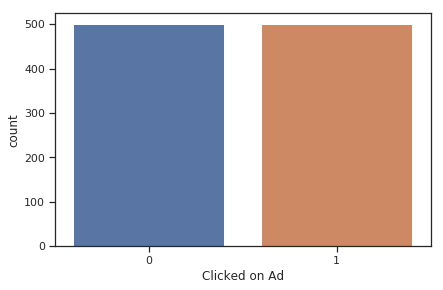

In [170]:
# The targets seems to me similar in cound that means the dataset is balanced
sns.countplot(data['Clicked on Ad'], data=data)

Text(0.5, 0, 'Age')

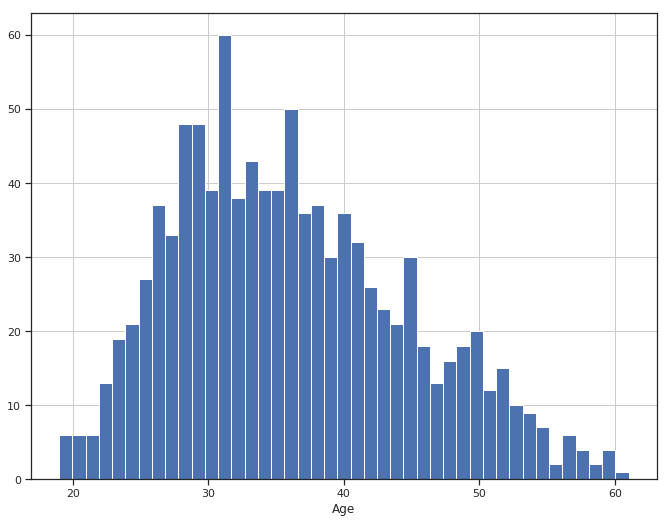

In [171]:
plt.figure(figsize=(10, 8))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')


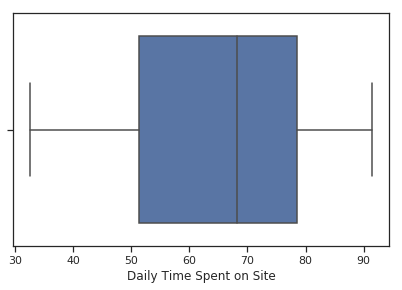

In [172]:
sns.boxplot(data["Daily Time Spent on Site"])

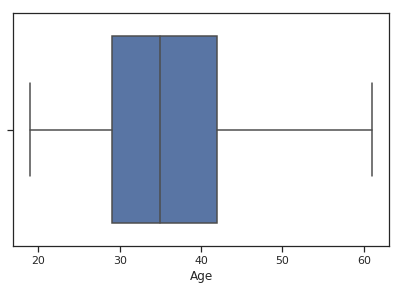

In [173]:
sns.boxplot(data["Age"])

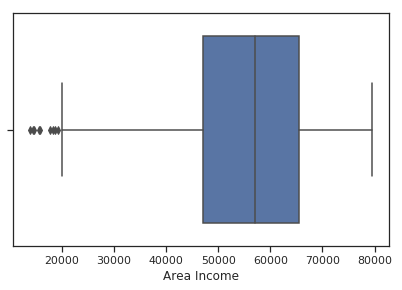

In [174]:
sns.boxplot(data["Area Income"])
# there are some

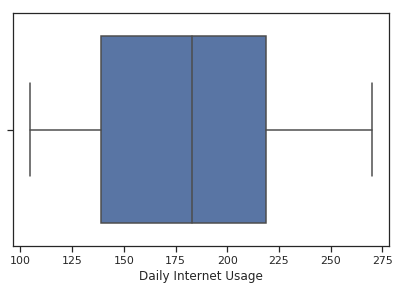

In [175]:
sns.boxplot(data["Daily Internet Usage"])

Feature engineering and feature selection

In [176]:
X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Male', 'City', 'Country'], axis=1)
y = data['Clicked on Ad']

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 4) (800,)
(200, 4) (200,)


In [179]:
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

Random forest

Classification and prediction

In [180]:
# defining the classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
rf = RandomForestClassifier(criterion='gini', n_estimators=400,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)

# training

rf.fit(X_train,y_train)

# prediction

y_pred = rf.predict(X_test)


Evaluation

In [181]:
# Performing cross validation

from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf,
                         X_train, 
                         y_train, 
                         cv=kf,
                         scoring="accuracy", 
                         n_jobs=-1) 
scores.mean()

0.975

Text(0.5, 1.05, 'Confusion_matrix')

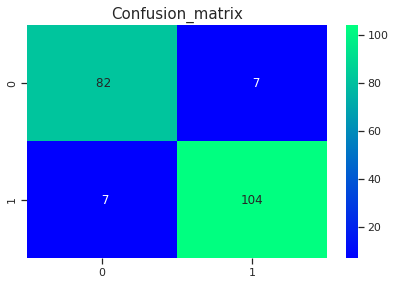

In [182]:
# Plotting confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

In [183]:
# Performances
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        89
           1       0.94      0.94      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



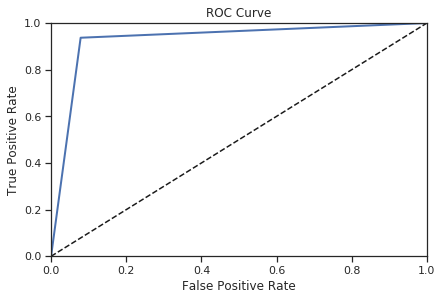

<Figure size 864x576 with 0 Axes>

In [184]:
# ROC CURVE

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.figure(figsize=(12,8)); 
plt.show();

In [185]:
# ROC-AUC SCORE

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9291426257718393

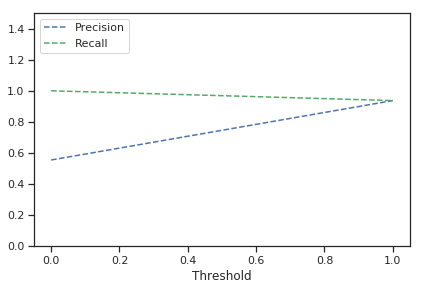

<Figure size 864x576 with 0 Axes>

In [186]:
# PRECISION RECALL TRADEOFF

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim(0, 1.5)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 8))
plt.show()

Logistic Regression

In [187]:
# classification 
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

# Fit the model on training data
model = lg.fit(X_train,y_train)

# Prediction
y_pred = lg.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [188]:
# Performing cross validation

from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lg,
                         X_train, 
                         y_train, 
                         cv=kf,
                         scoring="accuracy", 
                         n_jobs=-1) 
scores.mean()

0.9712499999999998

Text(0.5, 1.05, 'Confusion_matrix')

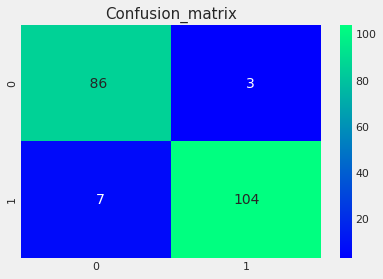

In [189]:
# Plotting confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

In [190]:
# Performances
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95        89
           1       0.97      0.94      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



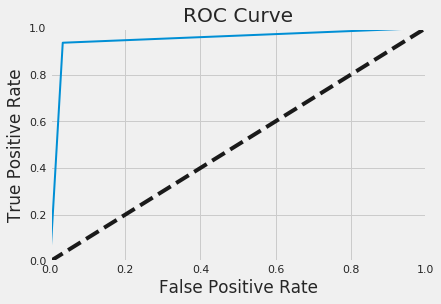

<Figure size 864x576 with 0 Axes>

In [191]:
# ROC CURVE

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.figure(figsize=(12,8)); 
plt.show();

In [192]:
# ROC-AUC SCORE

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9516145358841989

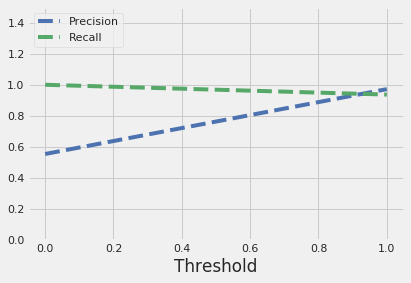

<Figure size 864x576 with 0 Axes>

In [193]:
# PRECISION RECALL TRADEOFF

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim(0, 1.5)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 8))
plt.show()

As finally we can see the Logistic Regression Performs better than Random forest